In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Class 6: Pandas and Statsmodels


## Background

In their article "The New Kaldor Facts: Ideas, Institutions, Population, and Human Capital" in the January 2010 issue of the *American Economic Journal: Macroeconomics*, Charles Jones and Paul Romer document six empirical features about macroeconomics that are yet to be adequately explained by a general theory of economic growth (link to article: [https://www.jstor.org/stable/25760291](https://www.jstor.org/stable/25760291)). Among these facts is the observation that total factor productivity is positively correlated with a country's GDP per worker.

Recall the Cobb-Douglas production function with human capital:

\begin{align}
Y & = A K^{\alpha}\left(hL\right)^{1-\alpha}, \label{eqn:production}
\end{align}

where $Y$ denotes the production of final goods and services, $K$ is the stock of physical capital, $L$ is the labor force (either number of workers or number of worker hours), $h$ is human capital per worker, and $A$ is *total factor productivity* or TFP which represents all other factors that might affect production that are not captured by $K$, $L$, or $h$. 

For most countries, we can measure $Y$, $K$, $L$ and $h$. Measurements may not be perfect; for example, we often associate $h$ with years of schooling in a country even though, strictly speaking, on-the-job experience and training also contribute to human capital accumulation. Regardless, the point is that the production function *implies* a value for TFP:

\begin{align}
A & = \frac{Y}{K^{\alpha}(hL)^{1-\alpha}}
\end{align}

TFP is like a residual in a linear regression: it is the part of production that is not explained by observable inputs for production. Remarkably, Jones and Romer show that TFP explains a lot of the variation in GDP per worker across countries. This fact is captured in Figure 1.

<br>

<div align="center">
 <figure style="display: table">
   <img src="https://raw.githubusercontent.com/letsgoexploring/econ126/master/Img/external_fig_08_New_Kaldor_Facts_Jones_Romer_Fig4.png" width="75%" height="75%"> 
  <figcaption style="display: table-caption; caption-side: top; text-align: center;" >Figure 1. <strong>TFP and GDP per capita across countries </strong> relative to the US. Source: Jones and Romer (2010)</figcaption>
</figure> 
</div>

<br>

In this Notebook, we will replicate Figure 1 and use a linear regression procedure to estimate the relationship between TFP and GDP per worker. The data required for the exercise is named `cross_country_production.csv` and is available here: https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/cross_country_production.csv
The file contains production data in 2014 for 144 countries. In addition to the name and country code, the file contains production data for 144 countries in 2014:


| Name               | Description               | Units                       |
|--------------------|---------------------------|-----------------------------|
| `gdp`              | real GDP                  | Millions of 2001 US dollars |
| `labor`            | Average number of workers | Millions                    |
| `physical_capital` | Physical capital stock    | Millions of 2001 US dollars |
| `human_capital`    | Human capital per worker  | Index (unitless)            |

We can use the data to compute TFP for each country in the sample and then to replicate Figure 1.

## Replicate Figure from Jones and Romer (2010)

Import the production data. Add new columns containing GDP per worker, physical capital per worker, and TFP. Construct three scatter plots:
1. GDP per worker against physical capital per worker
2. GDP per worker against human capital per worker
3. TFP against GDP per worker

In [2]:
# Import data into a DataFrame called 'df'. Use the leftmost column as the index
df = pd.read_csv('https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/cross_country_production.csv',index_col=0)

# Print the first five rows of the imported data
df.head()

,country,gdp,labor,human_capital,physical_capital
country_code,,,,,
AGO,Angola,205371.265625,8.343885,1.445598,7.960541e+05
ALB,Albania,31419.962891,0.883679,2.930766,1.127928e+05
ARE,United Arab Emirates,618051.187500,5.938807,2.730336,2.429822e+06
ARG,Argentina,859908.500000,18.098450,2.945663,2.148251e+06
ARM,Armenia,27410.783203,1.201936,3.122178,4.400342e+04


In [3]:
# Add a column to df called 'gdp_pw' equal to GDP divided by labor divided by 1000 so units are in thousands of $
df['gdp_pw'] = df['gdp']/df['labor']/1000

# Add a column to df called 'physical_capital_pw' equal to physical capital divided by labor divided by 1000 so units are in thousands of $
df['physical_capital_pw'] = df['physical_capital']/df['labor']/1000

# Set alpha to 1/3
alpha =1/3

# Add a column to df called 'tfp' equal to TFP computed using the production function
df['tfp'] = df['gdp']/df['physical_capital']**alpha/(df['labor']*df['human_capital'])**(1-alpha)

# Sort the rows of df so that the GDP per worker column is in ascending order
df = df.sort_values('gdp_pw')

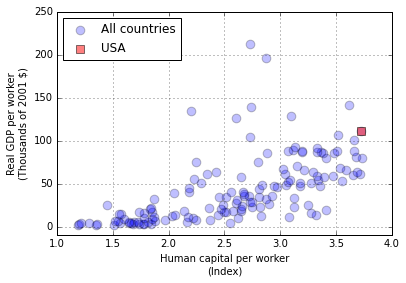

In [4]:
# Construct a scatter plot of real GDP per worker against human capital per worker with:
#    1. All countries as blue circles, size 75, opacity (alpha) 0.25, label: 'All countries'
#    2. USA as red square, size 75, opacity (alpha) 0.5, label='USA'
#    3. Add a legend in the upper left corner with scatterpoints=1
#    4. y-axis limits: [-10,250]
#    5. x-axis label: 'Human capital per worker\n(Index)'
#    6. y-axis label: 'Real GDP per worker\n(Thousands of 2001 $)'
#    7. Add a grid if you'd like

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['human_capital'],df['gdp_pw'],s=75,alpha=0.25,label='All countries')
ax.scatter(df['human_capital'].loc['USA'],df['gdp_pw'].loc['USA'],marker='s',c='r',s=75,alpha=0.5,label='USA')
ax.legend(scatterpoints=1,loc='upper left')
ax.set_ylim([-10,250])
ax.set_xlabel('Human capital per worker\n(Index)')
ax.set_ylabel('Real GDP per worker\n(Thousands of 2001 $)')
ax.grid()

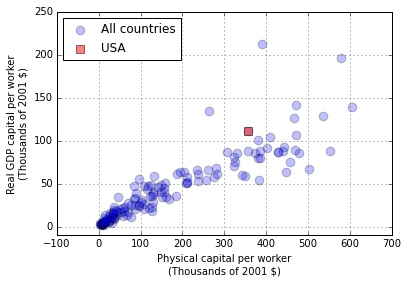

In [5]:
# Construct a scatter plot of real GDP per worker against physical capital per worker with:
#    1. All countries as blue circles, size 75, opacity (alpha) 0.25, label: 'All countries'
#    2. USA as red square, size 75, opacity (alpha) 0.5, label='USA'
#    3. Add a legend in the upper left corner with scatterpoints=1
#    4. y-axis limits: [-10,250]
#    5. x-axis label: 'Physical capital per worker\n(Thousands of 2001 $)'
#    6. y-axis label: 'Real GDP per worker\n(Thousands of 2001 $)'
#    7. Add a grid if you'd like

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['physical_capital_pw'],df['gdp_pw'],s=75,alpha=0.25,label='All countries')
ax.scatter(df['physical_capital_pw'].loc['USA'],df['gdp_pw'].loc['USA'],marker='s',c='r',s=75,alpha=0.5,label='USA')
ax.legend(scatterpoints=1,loc='upper left')
ax.set_ylim([-10,250])
ax.set_xlabel('Physical capital per worker\n(Thousands of 2001 $)')
ax.set_ylabel('Real GDP capital per worker\n(Thousands of 2001 $)')
ax.grid()

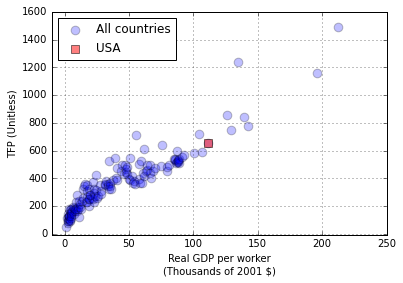

In [6]:
# Construct a scatter plot of TFP against real GDP per worker with:
#    1. All countries as blue circles, size 75, opacity (alpha) 0.25, label: 'All countries'
#    2. USA as red square, size 75, opacity (alpha) 0.5, label='USA'
#    3. Add a legend in the upper left corner with scatterpoints=1
#    4. x-axis limits: [-10,250]
#    4. y-axis limits: [-10,1600]
#    6. x-axis label: 'Real GDP capital per worker\n(Thousands of 2001 $)'
#    7. y-axis label: 'TFP (Unitless)'
#    8. Add a grid if you'd like

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['gdp_pw'],df['tfp'],s=75,alpha=0.25,label='All countries')
ax.scatter(df['gdp_pw'].loc['USA'],df['tfp'].loc['USA'],marker='s',c='r',s=75,alpha=0.5,label='USA')
ax.legend(scatterpoints=1,loc='upper left')
ax.set_xlim([-10,250])
ax.set_ylim([-10,1600])
ax.set_xlabel('Real GDP per worker\n(Thousands of 2001 $)')
ax.set_ylabel('TFP (Unitless)')
ax.grid()

The strong positive relationship between GDP per worker and TFP means that *even after accounting for their lower levels of human capital per worker and physical capital per worker*, workers in lower-income countries are less productive because they use what human and physical capital the *do* have less efficiently than workers in higher-income countries. And since TFP isn't directly observable, we still don't know exactly why.<!-- answer -->

## Estimate Relationship Between TFP and GDP per Worker

The Statsmodels module is an excellent tool for a broad range of statistical applications. Learn more about Statsmodels here: https://www.statsmodels.org/stable/index.html. We can use the module to estimate the relationship between TFP and GDP per worker in our data.

Since the scatter plot reveals some curvature in the relationship between TFP and GDP per worker, let's specifiy the linear regression model with the variables in logs:

\begin{align}
\log \text{TFP}_i & = \beta_0 + \beta_1 \log \text{GDP}_i + \epsilon_i
\end{align}

Once we've obtained the estimated coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can compute predicted values for TFP $\widehat{TFP}_i$ using by setting $\epsilon_i=0$ and solving the regression equation for TFP:

\begin{align}
\widehat{TFP}_i & = \exp\left(\hat{\beta}_0 + \hat{\beta}_1 \log \text{GDP}_i\right)
\end{align}

In [7]:
# Import the Statsmodels module
import statsmodels.api as sm

In [8]:
# Create a variable called 'y' that will be to the dependent variable in the regression
y = np.log(df['tfp'])

# Create a variable called 'x' that will be to the independent variable in the regression
x = np.log(df['gdp_pw'])

# Use the function sm.add_constant() to add a constant to x
x = sm.add_constant(x)

# Print the first five rows of x
print(x.head())

              const    gdp_pw
country_code                 
CAF             1.0  0.315622
BDI             1.0  0.611815
NER             1.0  0.893346
MWI             1.0  0.913269
LBR             1.0  0.960224


In [9]:
# Create an OLS model using Statsmodels
model = sm.OLS(y,x)

# Fit the OLS model to data
results = model.fit()

# Print the summary2() method of results to print summary of regression results:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.905   
Dependent Variable: tfp              AIC:                -78.3129
Date:               2021-01-19 12:57 BIC:                -72.3732
No. Observations:   144              Log-Likelihood:     41.156  
Df Model:           1                F-statistic:        1359.   
Df Residuals:       142              Prob (F-statistic): 1.36e-74
R-squared:          0.905            Scale:              0.033524
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const        4.1585     0.0463   89.8804   0.0000   4.0670   4.2499
gdp_pw       0.4936     0.0134   36.8661   0.0000   0.4671   0.5200
-----------------------------------------------------------------
Omnibus:              6.608        Durbin-Watson:           1.890
Prob(Omnibus):   

Estimated coefficients are stored in the `params` attribute of `results`. Residuals of the regression are stored in the attribute `resid`. And predicted values of the dependent variable are stored in `fittedvalues`.

In [10]:
# Print estimated coefficients of linear regression
print(results.params)

const     4.158469
gdp_pw    0.493573
dtype: float64


In [11]:
# Print R-squared of the regression
print(results.rsquared)

0.9054032510077362


**Question**

1. What is the interpretation of the coefficient on log GDP per worker?
2. What is the R-squared of the regression? What does it mean?

**Answer**

1. A one percent increase in GDP per worker increases TFP by one half of a percent.<!-- answer -->
2. The R-squared of the regression is 0.905 and means that GDP per worker explains over 90 percent of the variation in TFP.<!-- answer -->

In [12]:
# Print the first five rows of residuals.
print(results.resid.head())

country_code
CAF   -0.368663
BDI    0.253711
NER   -0.036212
MWI   -0.222537
LBR   -0.093016
dtype: float64


In [13]:
# Print the mean of the residuals of the regression.
print(results.resid.mean())

2.917419392487217e-15


In [14]:
# Create a variable called 'yhat' equal to the fitted values of y:
yhat = results.fittedvalues

# Print the first five rows of yhat
print(yhat.head())

country_code
CAF    4.314252
BDI    4.460445
NER    4.599401
MWI    4.609234
LBR    4.632410
dtype: float64


Recall that we can use estimated parameters can be used to compute out-of-sample predictions:

\begin{align}
\widehat{TFP}_i & = \exp\left(\hat{\beta}_0 + \hat{\beta}_1 \log \text{GDP}_i\right)
\end{align}

In [15]:
# Create variable called 'gdp_values' that is an array from 0.1 to 300
gdp_values = np.arange(0.1,300,0.001)

# Create variable called 'beta0' equal to the constant of the regression
beta0 = results.params['const']

# Create variable called 'beta1' equal to the coefficient on log GDP per worker from the regression
beta1 = results.params['gdp_pw']

# Create a variable called 'ahat' that is equal to the predicted values of TFP corresponding to gdp_values
ahat = np.exp(beta0 + beta1*np.log(gdp_values))

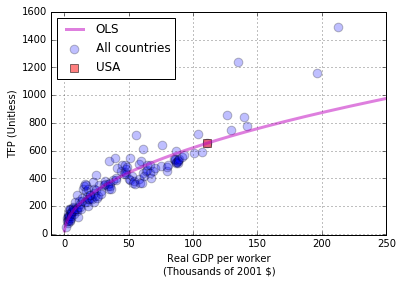

In [16]:
# Recreate the scatter plot of TFP against real GDP per worker with:
#    1. All features and settings from the previous plot
#    2. A plot of ahat against gdp_values; linewidth: 3, opacity: 0.5, label: 'OLS', color: magenta (c='m')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['gdp_pw'],df['tfp'],s=75,alpha=0.25,label='All countries')
ax.scatter(df['gdp_pw'].loc['USA'],df['tfp'].loc['USA'],marker='s',c='r',s=75,alpha=0.5,label='USA')
ax.plot(gdp_values,ahat,c='m',lw=3,alpha=0.5,label='OLS')
ax.legend(scatterpoints=1,loc='upper left')
ax.set_xlim([-10,250])
ax.set_ylim([-10,1600])
ax.set_xlabel('Real GDP per worker\n(Thousands of 2001 $)')
ax.set_ylabel('TFP (Unitless)')
ax.grid()